In [1]:
import xarray
import numpy
import paths
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rc
from scipy.signal import detrend
import cartopy.crs as ccrs

trefht_all_em, trefht_xaer_em, trefht_xghg_em = paths.get_paths_cdata()[0:3]

In [59]:
all_data = xarray.open_dataset(trefht_all_em[0]).TREFHT
xghg_data = xarray.open_dataset(trefht_xghg_em[0]).TREFHT
xaer_data = xarray.open_dataset(trefht_xaer_em[0]).TREFHT
all_mean_data = all_data.mean(dim="time")
xghg_mean_data = xghg_data.mean(dim="time")
xaer_mean_data = xaer_data.mean(dim="time")
all_stacked_data = all_data.stack(paired_points=['lat','lon'])
xghg_stacked_data = xghg_data.stack(paired_points=['lat','lon'])
xaer_stacked_data = xaer_data.stack(paired_points=['lat','lon'])

In [67]:
ghg_mean_data = all_mean_data - xghg_mean_data
aer_mean_data = all_mean_data - xaer_mean_data
data = all_mean_data - ghg_mean_data - aer_mean_data

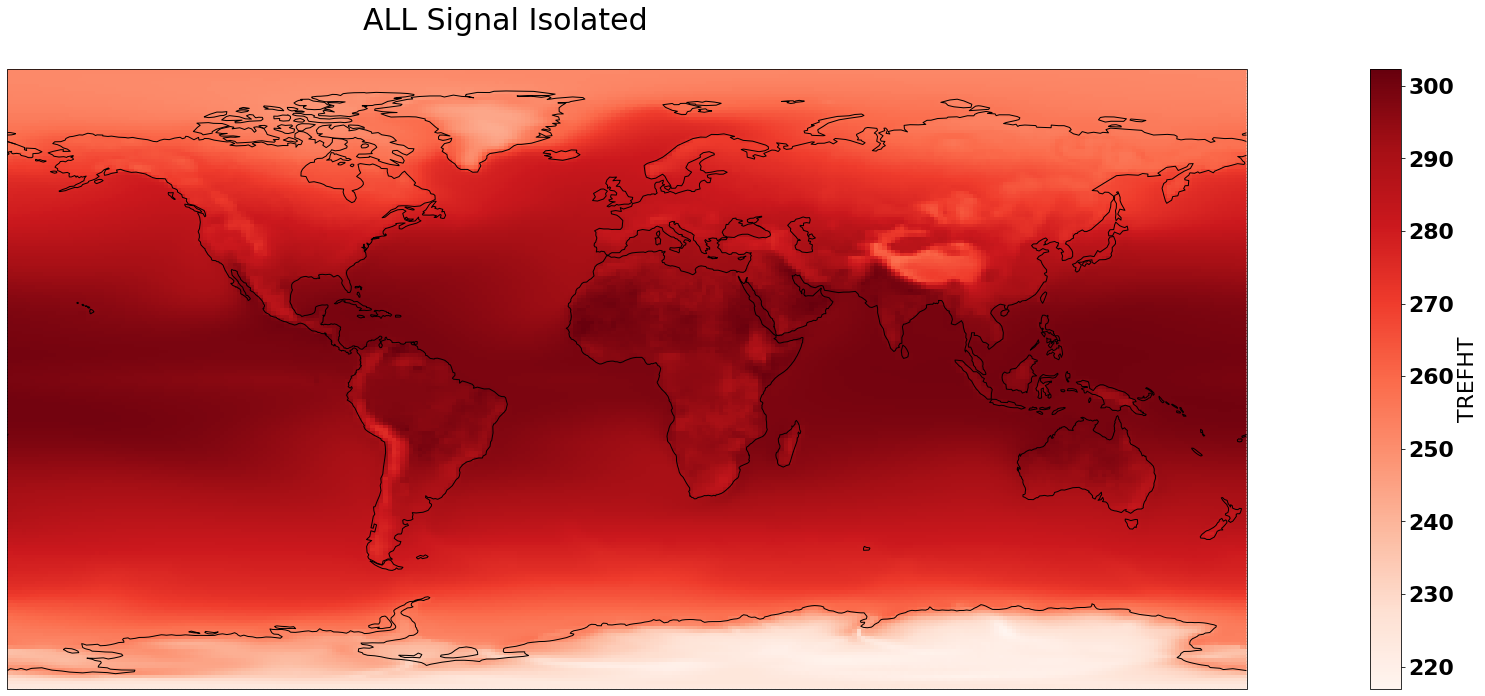

In [68]:
f, ax1 = plt.subplots(1, 1, figsize=(35, 10), facecolor='w', subplot_kw=dict(projection=ccrs.PlateCarree()))
f.suptitle(f"ALL Signal Isolated", fontsize=30)
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}
rc('font', **font)
#data = data.assign_coords(lon=(((data.lon + 180) % 360) - 180))
data.plot(ax=ax1, cmap="Reds")
ax1.coastlines()

f.tight_layout()